## implementation of LSA(latent semantic analysis)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',200)

In [5]:
from sklearn.datasets import fetch_20newsgroups

In [7]:
dataset=fetch_20newsgroups(shuffle=True,random_state=1,
                           remove=('header','footers','quotes'))
documents=dataset.data
len(documents)

11314

In [8]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### data preprocessing

In [9]:
news_df=pd.DataFrame({'document':documents})

news_df.head()

,document
0,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubject: Re: Israeli Terrorism\nOrganization: University of Virginia\nLines: 15"
1,"From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSubject: Re: Amusing atheists and agnostics\nLines: 66\n\n\n\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\nath..."
2,"From: bc744@cleveland.Freenet.Edu (Mark Ira Kaufman)\nSubject: Re: rejoinder. Questions to Israelis\nOrganization: Case Western Reserve University, Cleveland, Ohio (USA)\nLines: 38\nNNTP-Posting-H..."
3,From: ray@ole.cdac.com (Ray Berry)\nSubject: Clipper- business as usual?\nArticle-I.D.: ole.1993Apr20.173039.4722\nOrganization: Cascade Design Automation\nLines: 17\n\n\n Notwithstanding all t...
4,"From: kkeller@mail.sas.upenn.edu (Keith Keller)\nSubject: Playoff pool rule revision\nOrganization: University of Pennsylvania, School of Arts and Sciences\nLines: 10\nNntp-Posting-Host: mail.sas...."


In [10]:
#remove everything except alphabets
news_df['clean_doc']=news_df['document'].str.replace("[^a-zA-Z#]"," ")

In [11]:
#remove short words
news_df['clean_doc']=news_df['clean_doc'].apply(
                lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [12]:
#make all text lowercase
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x:x.lower())

#### remove stopwords

In [13]:
from nltk.corpus import stopwords

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
stop_words=stopwords.words('english')

In [18]:
#tokenization
tokenized_doc=news_df['clean_doc'].apply(lambda x:x.split())

In [19]:
#remove stop-words
tokenized_doc=tokenized_doc.apply(lambda x:
                        [item for item in x if item not in stop_words])

In [20]:
#de-tokenization
detokenized_doc=[]
for i in range(len(news_df)):
    t=' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
news_df['clean_doc']=detokenized_doc

### document-term matrix

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
#keep top 1000 terms
vectorizer=TfidfVectorizer(stop_words='english',
                           max_features=1000,max_df=0.5,smooth_idf=True)

In [23]:
X=vectorizer.fit_transform(news_df['clean_doc'])
X.shape

(11314, 1000)

### topic modeling

In [27]:
from sklearn.decomposition import TruncatedSVD

In [28]:
#SVD represent documents and terms in vectors
svd_model=TruncatedSVD(n_components=20,algorithm='randomized',
                       n_iter=100,random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [29]:
terms=vectorizer.get_feature_names()

for i,comp in enumerate(svd_model.components_):
    terms_comp=zip(terms,comp)
    sorted_terms=sorted(terms_comp,key=lambda x:x[1],reverse=True)[:7]
    print(f"Topic {str(i)}: ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
posting
 
host
 
nntp
 
university
 
distribution
 
like
 
reply
 
Topic 1: 
nntp
 
host
 
posting
 
university
 
distribution
 
reply
 
cwru
 
Topic 2: 
windows
 
card
 
file
 
thanks
 
drive
 
help
 
files
 
Topic 3: 
university
 
state
 
ohio
 
cleveland
 
virginia
 
pitt
 
cwru
 
Topic 4: 
pitt
 
gordon
 
banks
 
computer
 
science
 
pittsburgh
 
reply
 
Topic 5: 
cleveland
 
cwru
 
freenet
 
reserve
 
western
 
case
 
pitt
 
Topic 6: 
nasa
 
state
 
access
 
ohio
 
space
 
cleveland
 
distribution
 
Topic 7: 
nasa
 
space
 
cleveland
 
cwru
 
team
 
freenet
 
game
 
Topic 8: 
access
 
sale
 
drive
 
digex
 
game
 
netcom
 
team
 
Topic 9: 
access
 
windows
 
digex
 
virginia
 
team
 
unix
 
university
 
Topic 10: 
world
 
distribution
 
virginia
 
reply
 
jesus
 
sale
 
drive
 
Topic 11: 
access
 
drive
 
digex
 
state
 
nasa
 
scsi
 
space
 
Topic 12: 
virginia
 
university
 
space
 
clipper
 
chip
 
drive
 
uiuc
 
Topic 13: 
caltech
 
institute
 
technology
 
sale
 
ke

### topic visualization

In [32]:
import umap

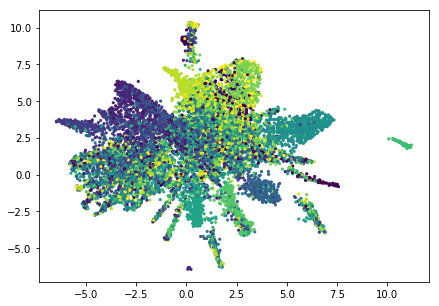

In [33]:
X_topics=svd_model.fit_transform(X)
embedding=umap.UMAP(n_neighbors=150,min_dist=0.5,random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:,0],embedding[:,1],c=dataset.target,s=10,edgecolor='none')
plt.show()